**Generate 100 Synthetic Data Points from Two Gaussian Distributions and assign the data points a category "0" or "1" depending on the Gaussian function they are obtained from**

To generate synthetic data, we create two Gaussian distributions with different means and covariances. Each distribution generates 50 data points, leading to a total of 100 data points. These points are labeled as '0' or '1', depending on the Gaussian distribution they originate from. This setup provides a basis for a binary classification problem, where our neural network will later learn to distinguish between the two categories based on these synthetic data points.

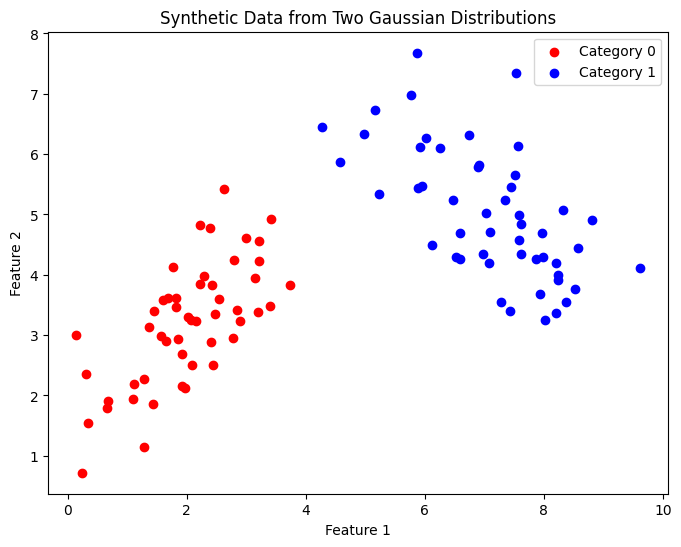

(array([[1.60359614, 3.57892681],
        [0.65452194, 1.79340928],
        [3.21315989, 4.56473157],
        [1.10023862, 1.94548105],
        [3.20340894, 3.38303733],
        [2.40085533, 2.88818363],
        [1.68632561, 3.6105055 ],
        [2.62874243, 5.42958178],
        [1.91385251, 2.15653378],
        [3.40891482, 4.9175201 ],
        [2.14936257, 3.23767312],
        [2.79885543, 4.24589288],
        [2.53371171, 3.59383197],
        [2.29145757, 3.98612067],
        [3.15166069, 3.94210539],
        [2.44902869, 2.50890212],
        [1.2879805 , 1.14980658],
        [1.11547901, 2.18920112],
        [1.91395842, 2.69215609],
        [1.27520903, 2.27503945],
        [2.88626716, 3.23679511],
        [2.08663548, 2.51166148],
        [2.84505758, 3.40868124],
        [2.22574578, 4.82564163],
        [3.74139191, 3.83723293],
        [0.31426027, 2.35437104],
        [1.64681659, 2.90344885],
        [0.68475909, 1.90977739],
        [1.82387972, 3.62354346],
        [2.421

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate 100 synthetic data points from two Gaussian distributions

# Parameters for the Gaussian distributions
mean1, cov1, label1 = [2, 3], [[1, 0.5], [0.5, 1]], 0  # Gaussian 1
mean2, cov2, label2 = [7, 5], [[1, -0.5], [-0.5, 1]], 1  # Gaussian 2

# Generating 50 points from each Gaussian distribution
data1 = np.random.multivariate_normal(mean1, cov1, 50)
data2 = np.random.multivariate_normal(mean2, cov2, 50)

# Labels
labels1 = np.full(50, label1)
labels2 = np.full(50, label2)

# Combining data and labels
data = np.vstack((data1, data2))
labels = np.hstack((labels1, labels2))

# Visualizing the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Category 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Category 1')
plt.title("Synthetic Data from Two Gaussian Distributions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Data and labels are ready
data, labels


In [4]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )


    def train(self, input_vectors, targets, iterations):
        '''
        next we define the train method. You pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.
        '''
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

**Use the Provided 2 Layers Neural Network to Evaluate the Expected Value of the Loss Function with the Provided Weights**

Here, we initialize a 2-layer neural network with a specified learning rate. The neural network is trained on the synthetic data generated in the previous step. The training involves adjusting the network's weights to minimize the error in predictions. The 'train' method of the `NeuralNetwork` class performs this optimization over a specified number of iterations, and we record the cumulative error at each step to observe the learning progress of the network.


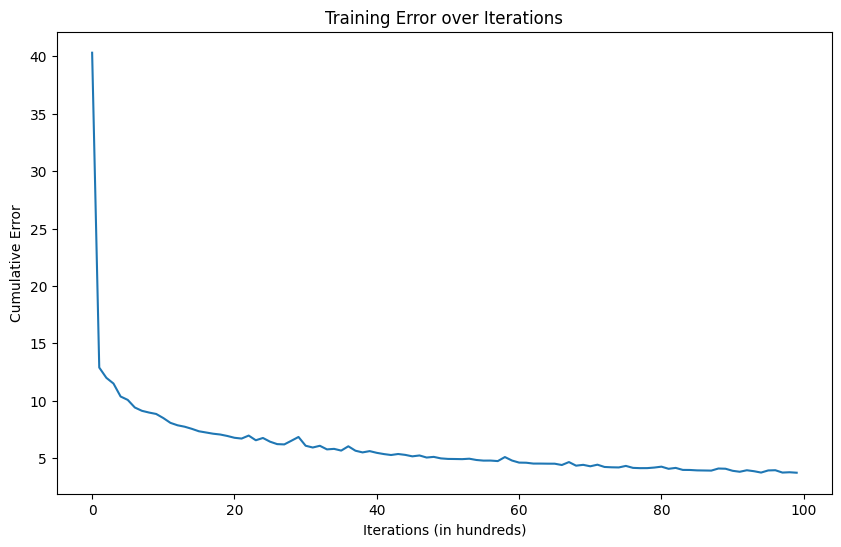

(array([ 1.34260822, -0.60155989]), -2.5506838567139987)

In [5]:
# Initialize the neural network with the provided learning rate
learning_rate = 0.01
neural_network = NeuralNetwork(learning_rate)

# Train the neural network on the generated data
iterations = 10000
training_errors = neural_network.train(data, labels, iterations)

# Plot the training error over iterations
plt.figure(figsize=(10, 6))
plt.plot(training_errors)
plt.xlabel('Iterations (in hundreds)')
plt.ylabel('Cumulative Error')
plt.title('Training Error over Iterations')
plt.show()

# Output the final weights and bias
final_weights = neural_network.weights
final_bias = neural_network.bias

final_weights, final_bias


**Manually Compute Weights that Would Improve the Prediction (Reduce the Error Value)**

After training the neural network, we manually adjust the weights and bias. The idea is to fine-tune these parameters based on our understanding of the model's performance. Such manual adjustments are experimental and aim to explore whether slight changes can lead to reduced prediction error. It's a process of trial and error, providing insight into the sensitivity of the network's performance to its parameters.



In [6]:
# Manually adjust the weights and bias
adjusted_weights = final_weights + np.array([0.1, -0.1])  # small adjustments
adjusted_bias = final_bias + 0.1

# Update the neural network with adjusted weights and bias
neural_network.weights = adjusted_weights
neural_network.bias = adjusted_bias

# Evaluate the performance after adjustment
# Computing cumulative error with adjusted weights and bias
cumulative_error_adjusted = 0
for data_instance_index in range(len(data)):
    data_point = data[data_instance_index]
    target = labels[data_instance_index]

    prediction = neural_network.predict(data_point)
    error = np.square(prediction - target)
    cumulative_error_adjusted += error

cumulative_error_adjusted, adjusted_weights, adjusted_bias



(3.7908639041555467, array([ 1.44260822, -0.70155989]), -2.4506838567139986)

**Test out the predictions**

And now, we can generate a test dataset using the same Gaussian distribution and 50 points, and compute using the NN above how well we can predict it!

In [16]:
# Generating test data points from the same Gaussian distributions

# Generating 50 points from each Gaussian distribution for test dataset
test_data1 = np.random.multivariate_normal(mean1, cov1, 50)
test_data2 = np.random.multivariate_normal(mean2, cov2, 50)

# Labels for the test data
test_labels1 = np.full(50, label1)
test_labels2 = np.full(50, label2)

# Combining test data and labels
test_data = np.vstack((test_data1, test_data2))
test_labels = np.hstack((test_labels1, test_labels2))

print(test_data, test_labels)


# Predict the labels for the test data using the neural network
predicted_test_labels = np.array([neural_network.predict(x) for x in test_data])

# Since the output of the neural network is continuous due to the sigmoid function,
# we need to apply a threshold to convert these to categorical labels (0 or 1)
threshold = 0.5
categorized_predictions = np.where(predicted_test_labels > threshold, 1, 0)

# Flatten the predictions to match the shape of test_labels
categorized_predictions = categorized_predictions.flatten()

# Evaluate the performance
accuracy = np.mean(categorized_predictions == test_labels)
print("And this is our accuracy ",accuracy)



[[ 3.1731805   3.688196  ]
 [ 3.43398718  3.55039476]
 [ 2.47490553  4.98365801]
 [ 0.96102925  1.99560475]
 [ 1.69303524  2.18648911]
 [ 2.05000888  3.76634545]
 [ 2.3521036   3.61505869]
 [ 1.61173092  2.28155546]
 [ 2.33067798  3.0340796 ]
 [ 2.7775702   2.11788261]
 [ 1.24255379  4.13927382]
 [ 2.95561944  2.9116859 ]
 [ 1.60975167  3.26470369]
 [ 1.36430998  2.46508617]
 [ 0.77779253  2.66559516]
 [ 2.99098608  3.55170301]
 [ 3.68453453  4.5579942 ]
 [ 3.05346882  2.81371089]
 [ 1.48397636  2.52312801]
 [ 2.77567034  3.40549404]
 [ 2.09270127  2.99804685]
 [ 3.40030903  3.96010318]
 [ 2.3394168   1.69553285]
 [ 2.59065896  4.21347696]
 [ 2.21871248  2.87507441]
 [ 0.82916343  2.32224612]
 [-0.41550494  1.945325  ]
 [ 0.91740548  2.41766992]
 [ 1.81810303  2.89310397]
 [ 1.92348665  3.17254351]
 [ 3.13086628  3.91546971]
 [ 2.17388485  4.14612618]
 [ 1.97606958  2.7968897 ]
 [ 2.58134719  3.98353009]
 [ 1.52047416  2.51675839]
 [ 0.34010014  2.20061409]
 [ 2.34728336  3.13653721]
 

**A little further**

We can even go a little and make multiple test datasets and make an average of the accuracies!!

In [18]:
num_runs = 10
accuracies = []
for _ in range(num_runs):
    # Generate a new set of test data
    test_data1 = np.random.multivariate_normal(mean1, cov1, 50)
    test_data2 = np.random.multivariate_normal(mean2, cov2, 50)
    test_data = np.vstack((test_data1, test_data2))
    test_labels = np.hstack((np.full(50, label1), np.full(50, label2)))

    # Predict the labels for the new test data
    predicted_test_labels = np.array([neural_network.predict(x) for x in test_data])
    categorized_predictions = np.where(predicted_test_labels > threshold, 1, 0).flatten()

    # Calculate and store the accuracy
    accuracy = np.mean(categorized_predictions == test_labels)
    accuracies.append(accuracy)

# Calculate the average accuracy
average_accuracy = np.mean(accuracies)
average_accuracy

0.9519999999999997